## importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

## loading the dataset

In [8]:
df=pd.read_csv(r"C:\Users\shana\OneDrive\Documents\star_classification.csv")
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [5]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [114]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [116]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [118]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [120]:
df.shape

(100000, 18)

## pre-processing

In [10]:
df['class']=LabelEncoder().fit_transform(df['class'])

In [12]:
df=df.drop(['obj_ID','run_ID','rerun_ID','field_ID','spec_obj_ID'],axis=1)

In [16]:
df.head(10)

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0,0.116123,6121,56187,842
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,3,1,1.424659,5026,55855,741
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,2,1,0.586455,11069,58456,113
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,2,0,0.477009,6183,56210,15
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,5,0,0.660012,6625,56386,719
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,4,2,-0.000008,2444,54082,232


In [11]:
df.corr()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD,fiber_ID
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,0.019582,-0.011756,0.001667,-0.002554,0.019943,0.030464
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.032565,0.014452,0.031638,0.112329,0.107333,0.028250
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.003548,-0.024645,0.014309,0.029997,0.031997,0.016305
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.003508,-0.020066,0.022954,0.039443,0.040274,0.017470
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.008480,-0.076766,0.433241,0.655243,0.671180,0.223106
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.007615,0.015028,0.492383,0.661640,0.672523,0.214787
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.003365,-0.001614,0.030380,0.037813,0.037469,0.014668
cam_col,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,1.000000,0.023138,0.000097,-0.001949,-0.006745,0.121597
class,-0.011756,0.014452,-0.024645,-0.020066,-0.076766,0.015028,-0.001614,0.023138,1.000000,-0.054239,-0.010060,-0.000405,-0.041586
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,0.000097,-0.054239,1.000000,0.388641,0.387109,0.127044


# EDA

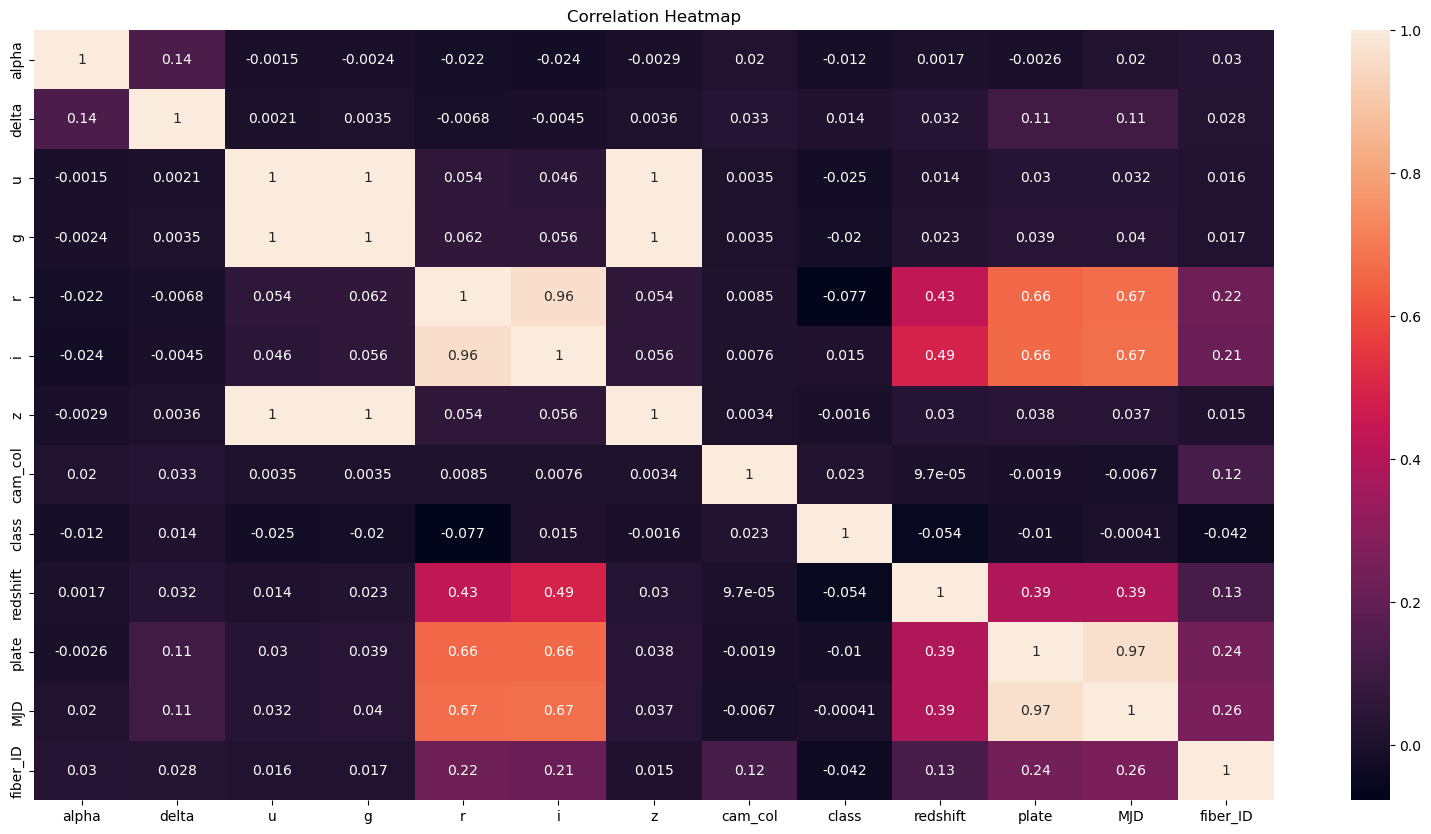

In [38]:
# correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

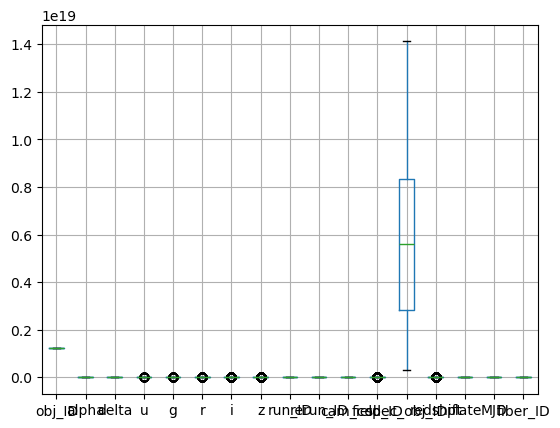

<Figure size 1000x800 with 0 Axes>

In [53]:
# boxplot
import matplotlib.pyplot as plt
df.boxplot()
plt.figure(figsize=(10,8))
plt.show()

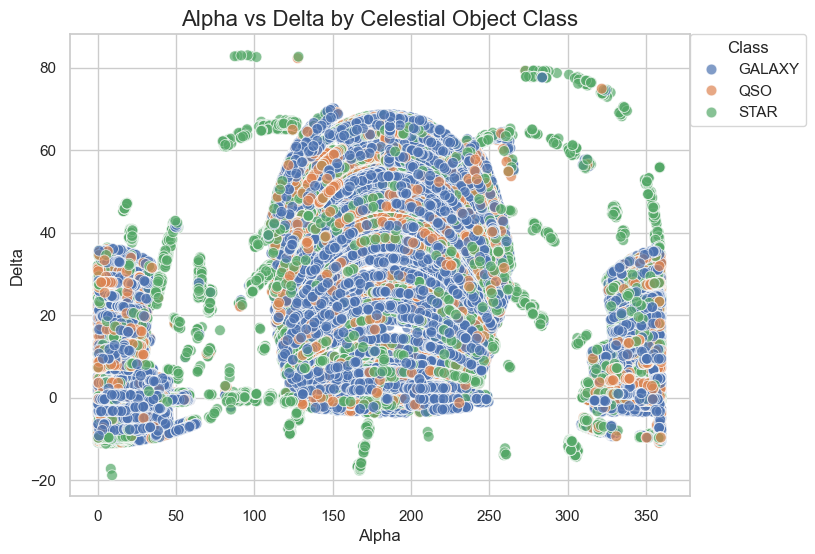

In [23]:
#scatter plot
plt.figure(figsize=(8, 6))  
sns.scatterplot(x="alpha", y="delta", data=df, hue="class", s=60, alpha=0.7, edgecolor="white")

plt.title('Alpha vs Delta by Celestial Object Class', fontsize=16)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Delta', fontsize=12)
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)  # Move legend outside the plot
plt.show()

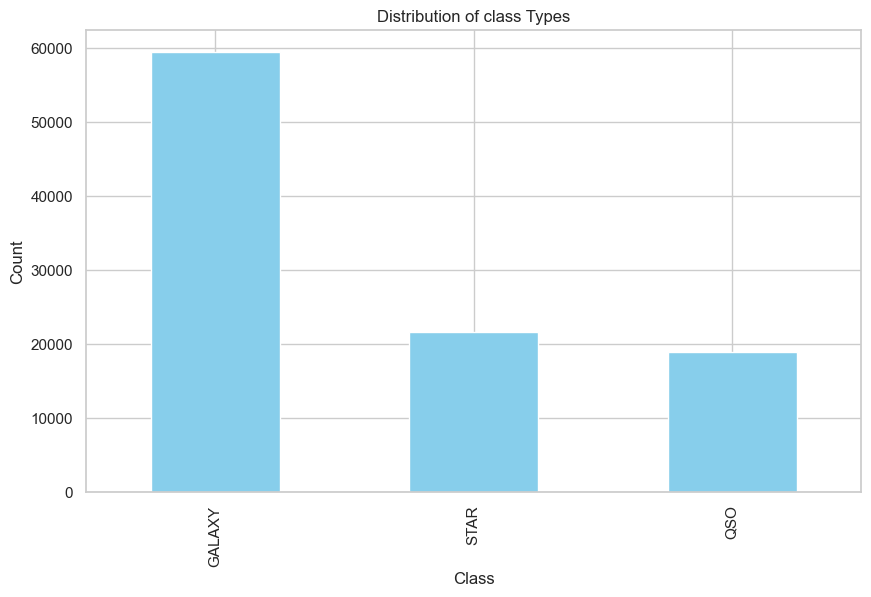

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Count occurrences of each star type
counts = df['class'].value_counts()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of class Types')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

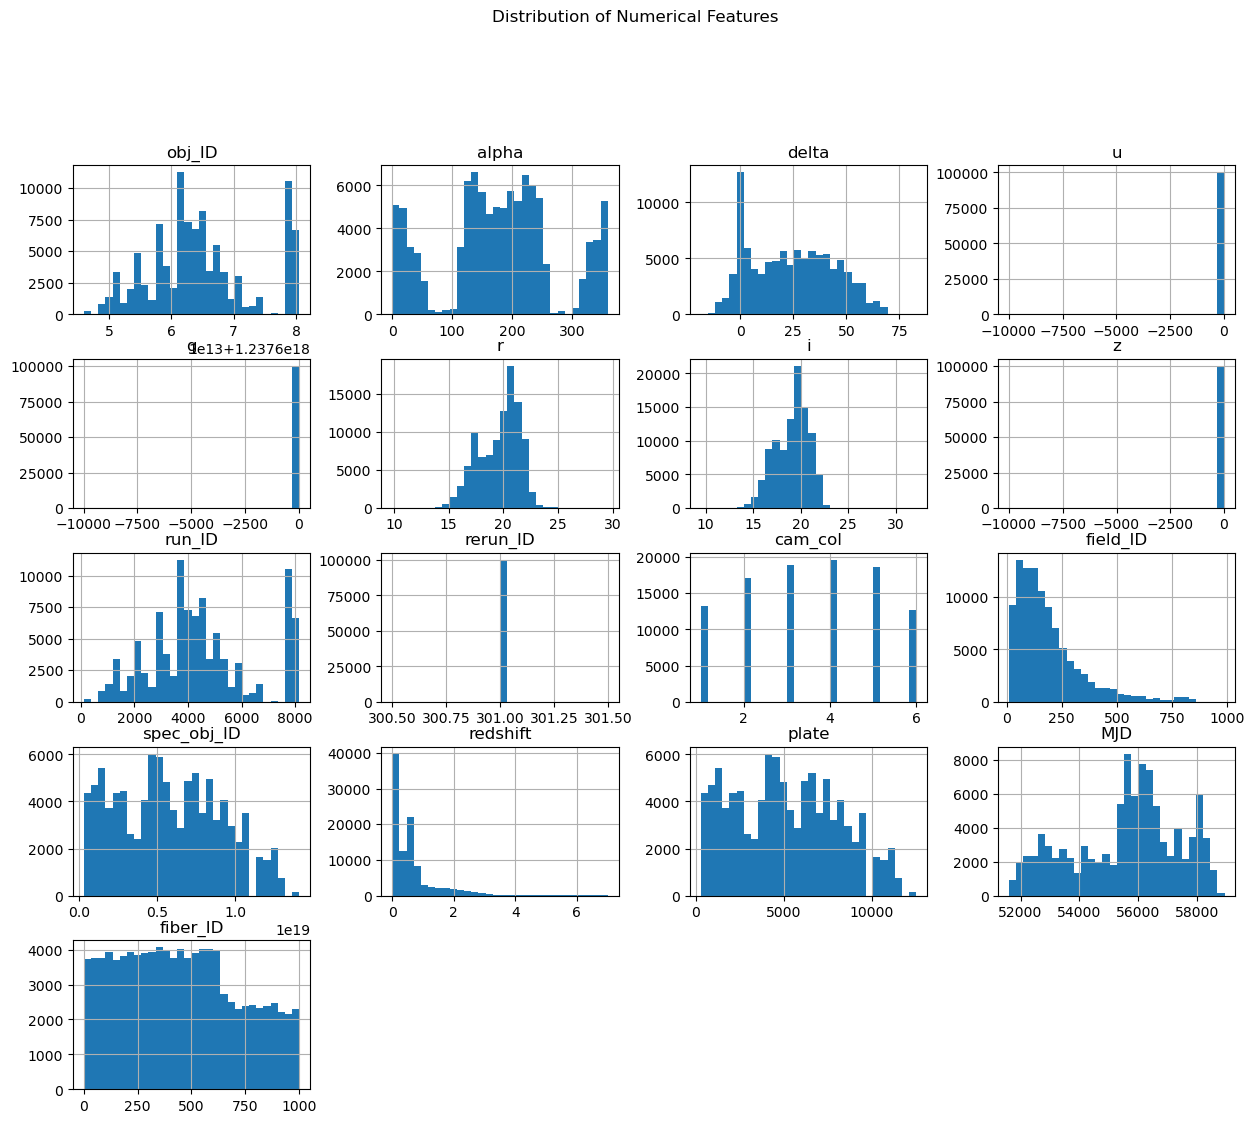

In [11]:
# histogram
import matplotlib.pyplot as plt
import pandas as pd

df.drop(columns=['class']).hist(bins=30, figsize=(15, 12))
plt.suptitle('Distribution of Numerical Features', y=1.01)
plt.show()

### Kernel Density Estimation (KDE) Plot:
Purpose: To estimate the probability density function of a random variable

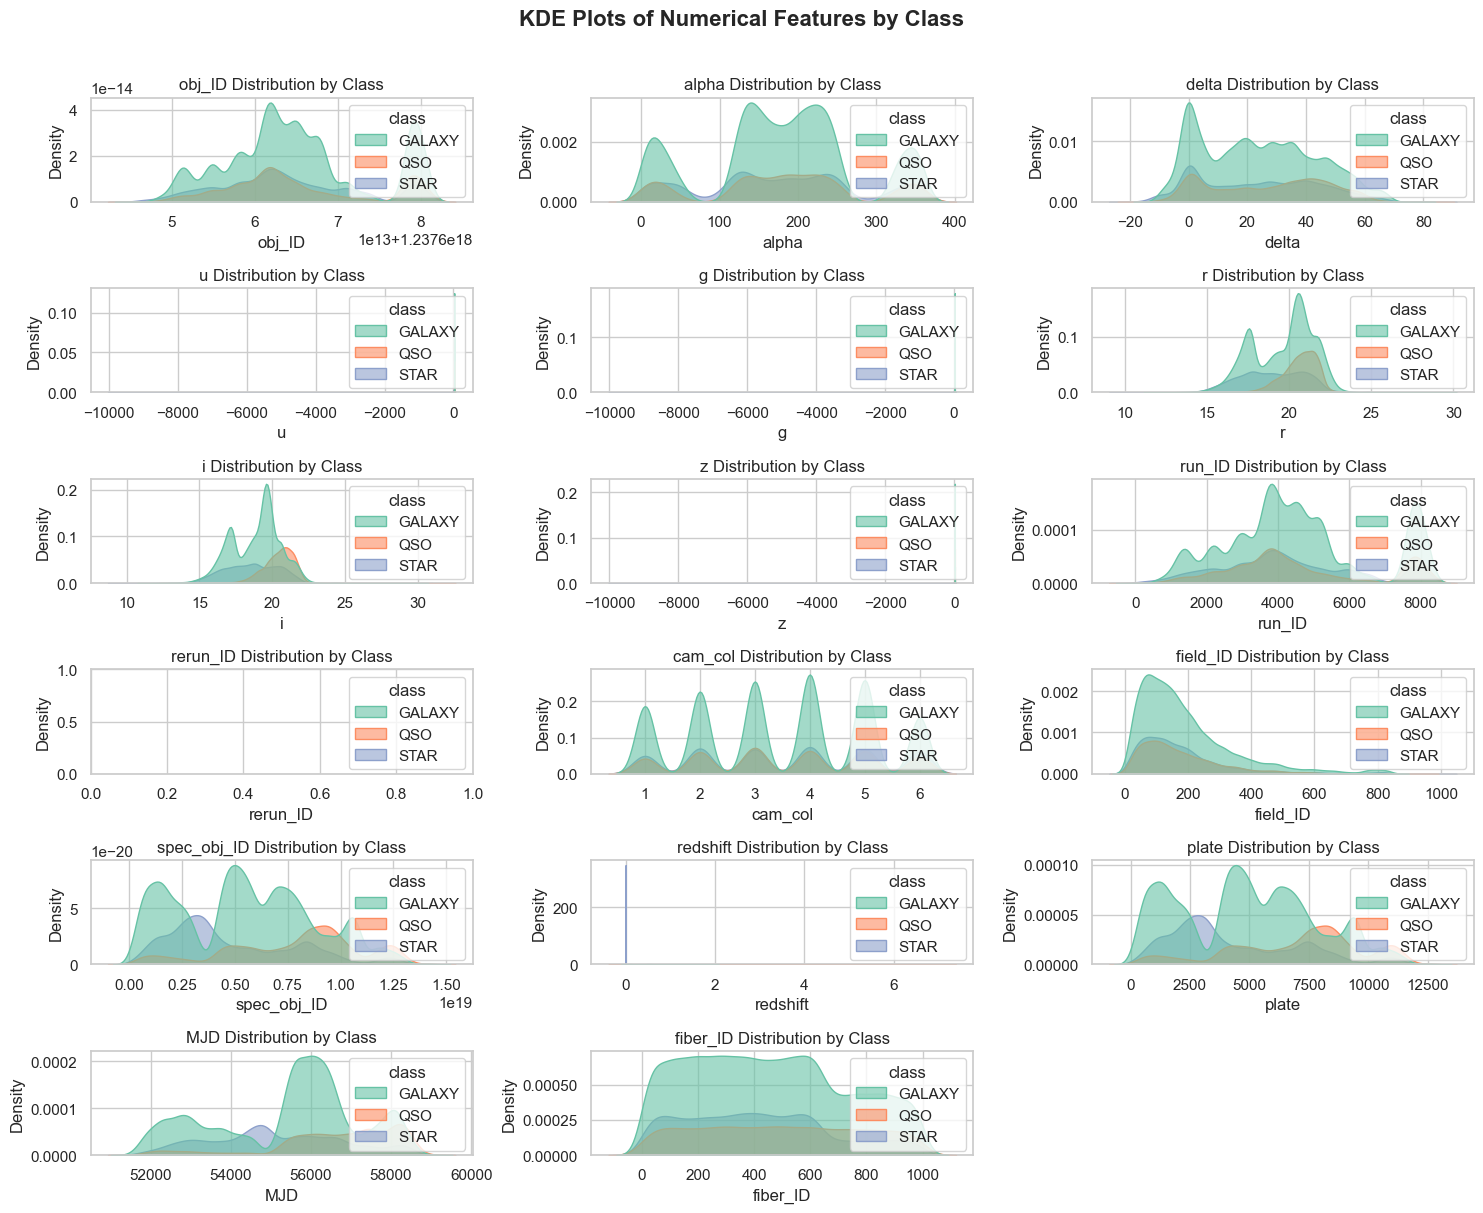

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns, excluding 'class'
num_cols = df.drop(columns=['class']).select_dtypes(include=['float64', 'int64']).columns

# Set up the figure for subplots
plt.figure(figsize=(15, 12))
for i, column in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)  # Arrange plots in a grid
    sns.kdeplot(data=df, x=column, hue='class', fill=True, alpha=0.6, palette='Set2')
    plt.title(f'{column} Distribution by Class', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Density')

# Add a main title
plt.suptitle('KDE Plots of Numerical Features by Class', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

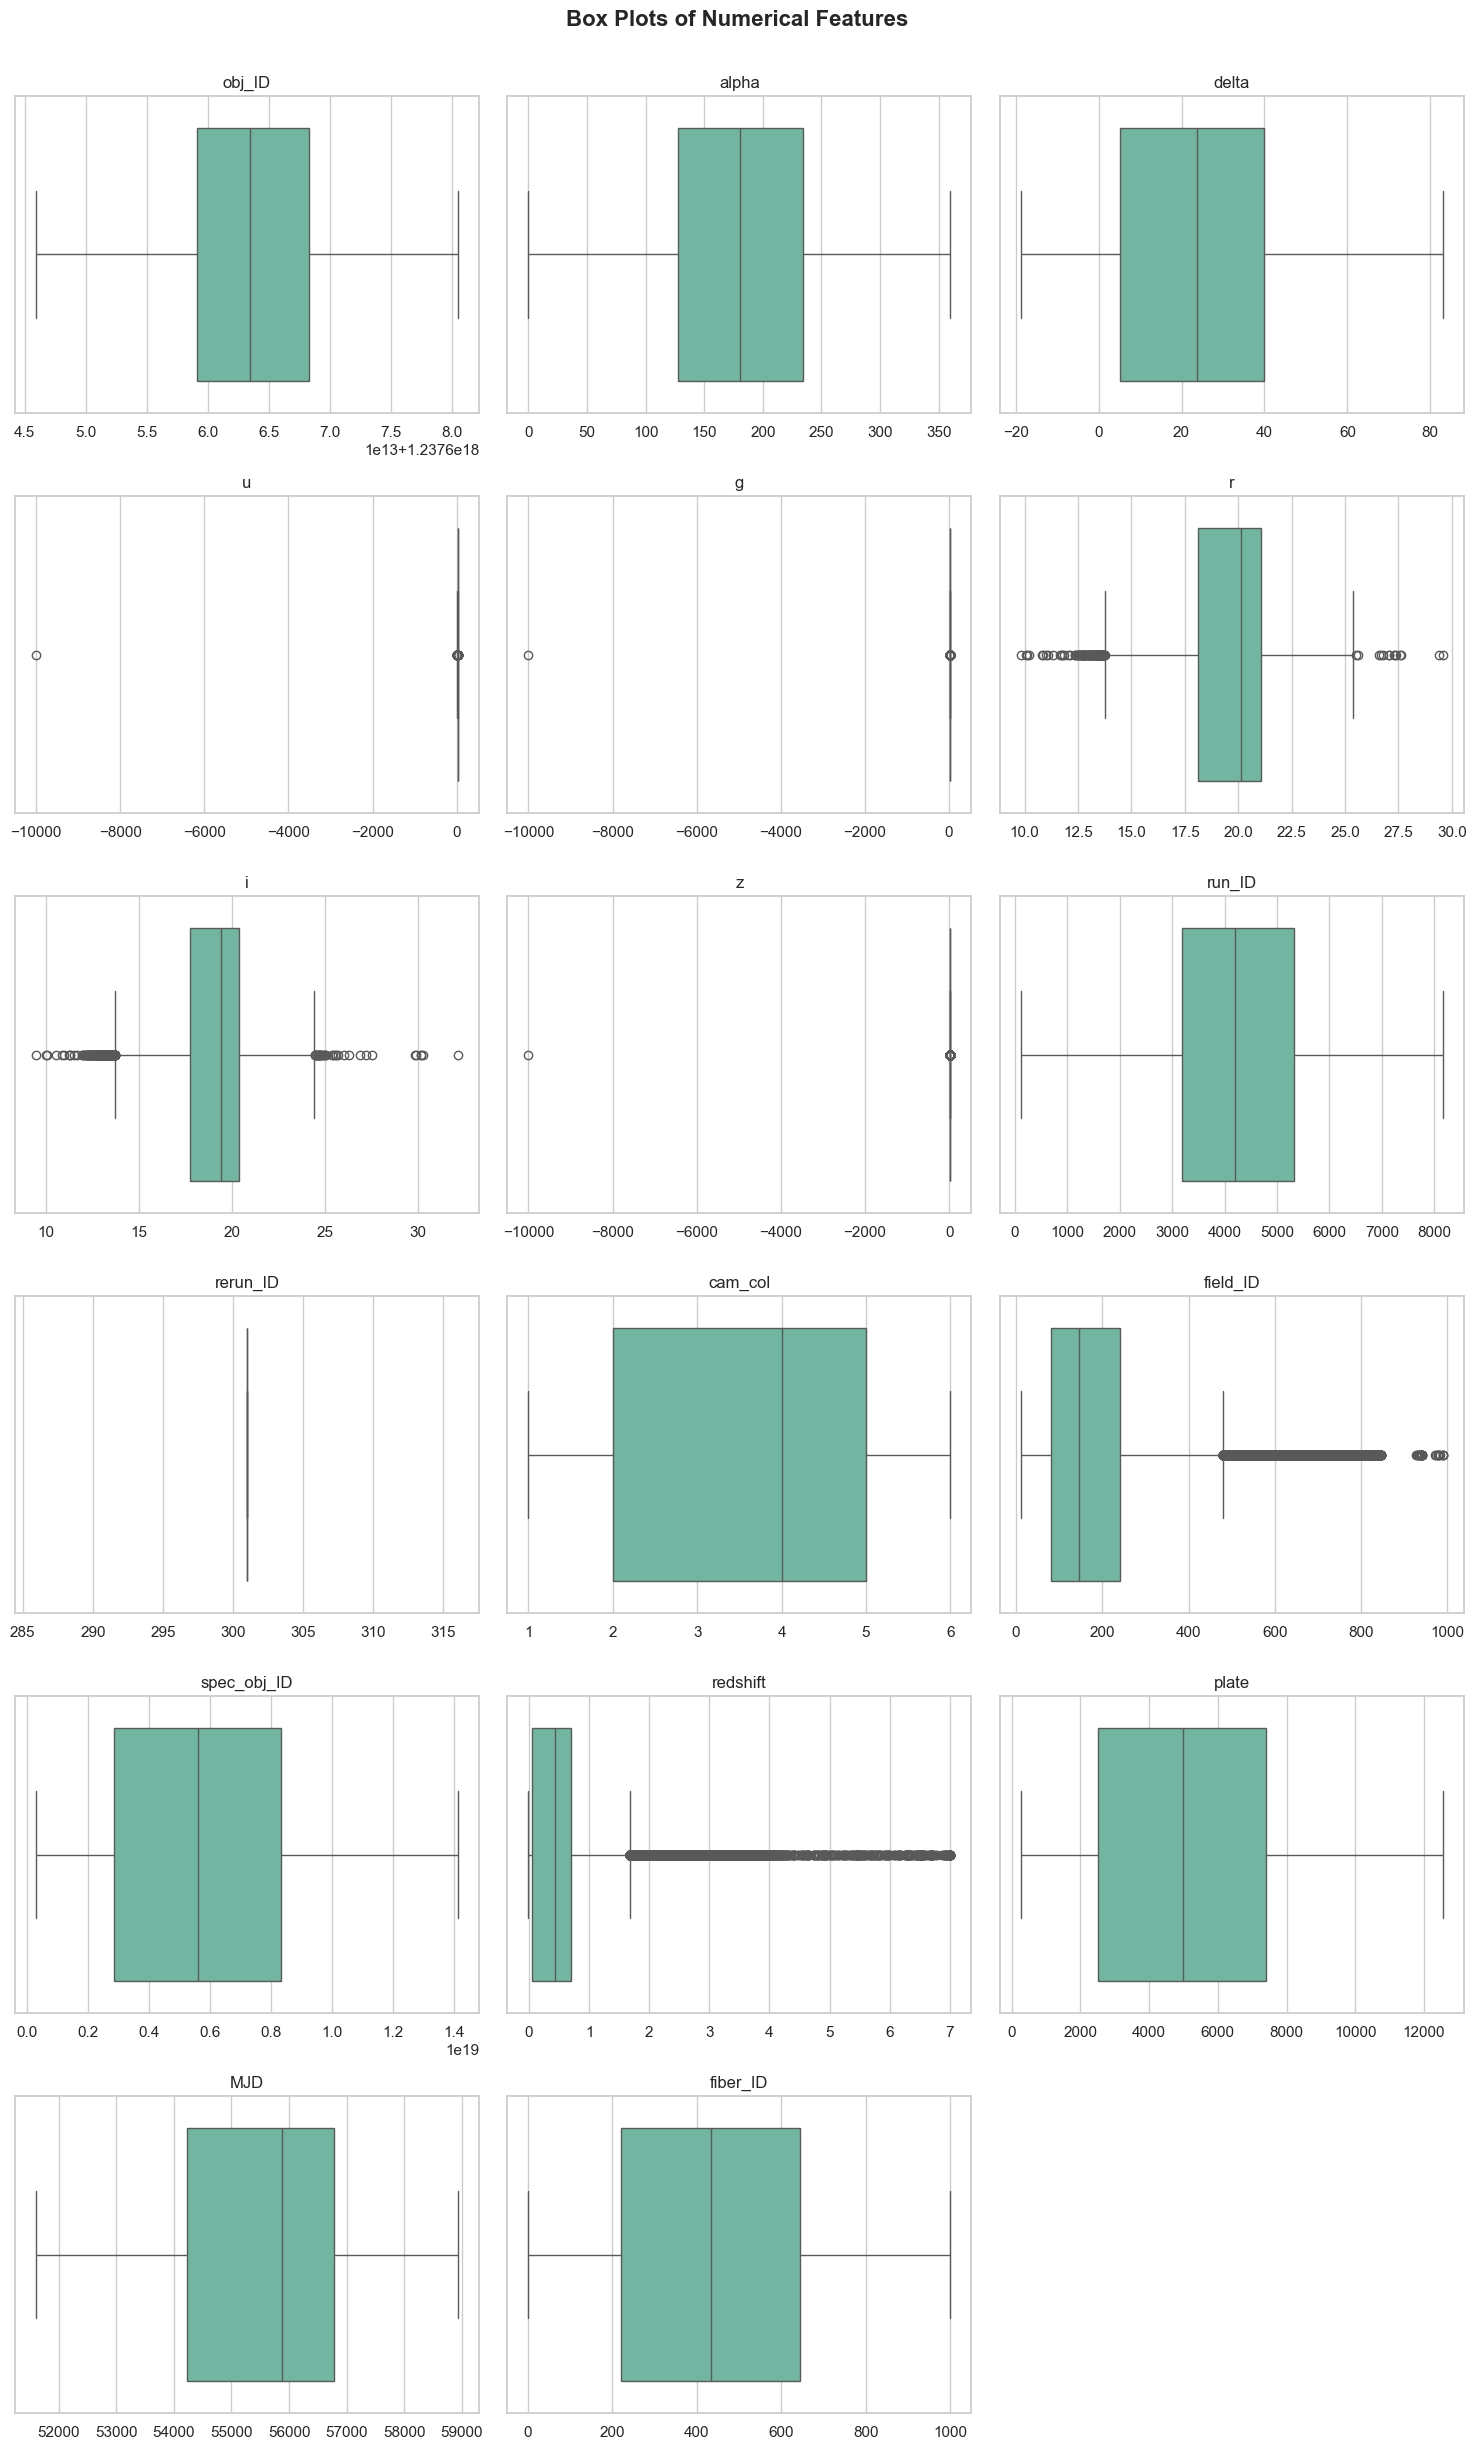

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of columns to display per row
plots_per_row = 3

# Set up subplots
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / plots_per_row)

plt.figure(figsize=(15, num_rows * 4))  # Adjust figure size based on the number of rows
for i, column in enumerate(num_cols, 1):
    plt.subplot(num_rows, plots_per_row, i)  # Create subplots in a grid
    sns.boxplot(x=df[column], palette="Set2")
    plt.title(f'{column}', fontsize=12)
    plt.xlabel('')

# Add some space between rows
plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features', y=1.02, fontsize=16, fontweight='bold')  # Main title
plt.show()


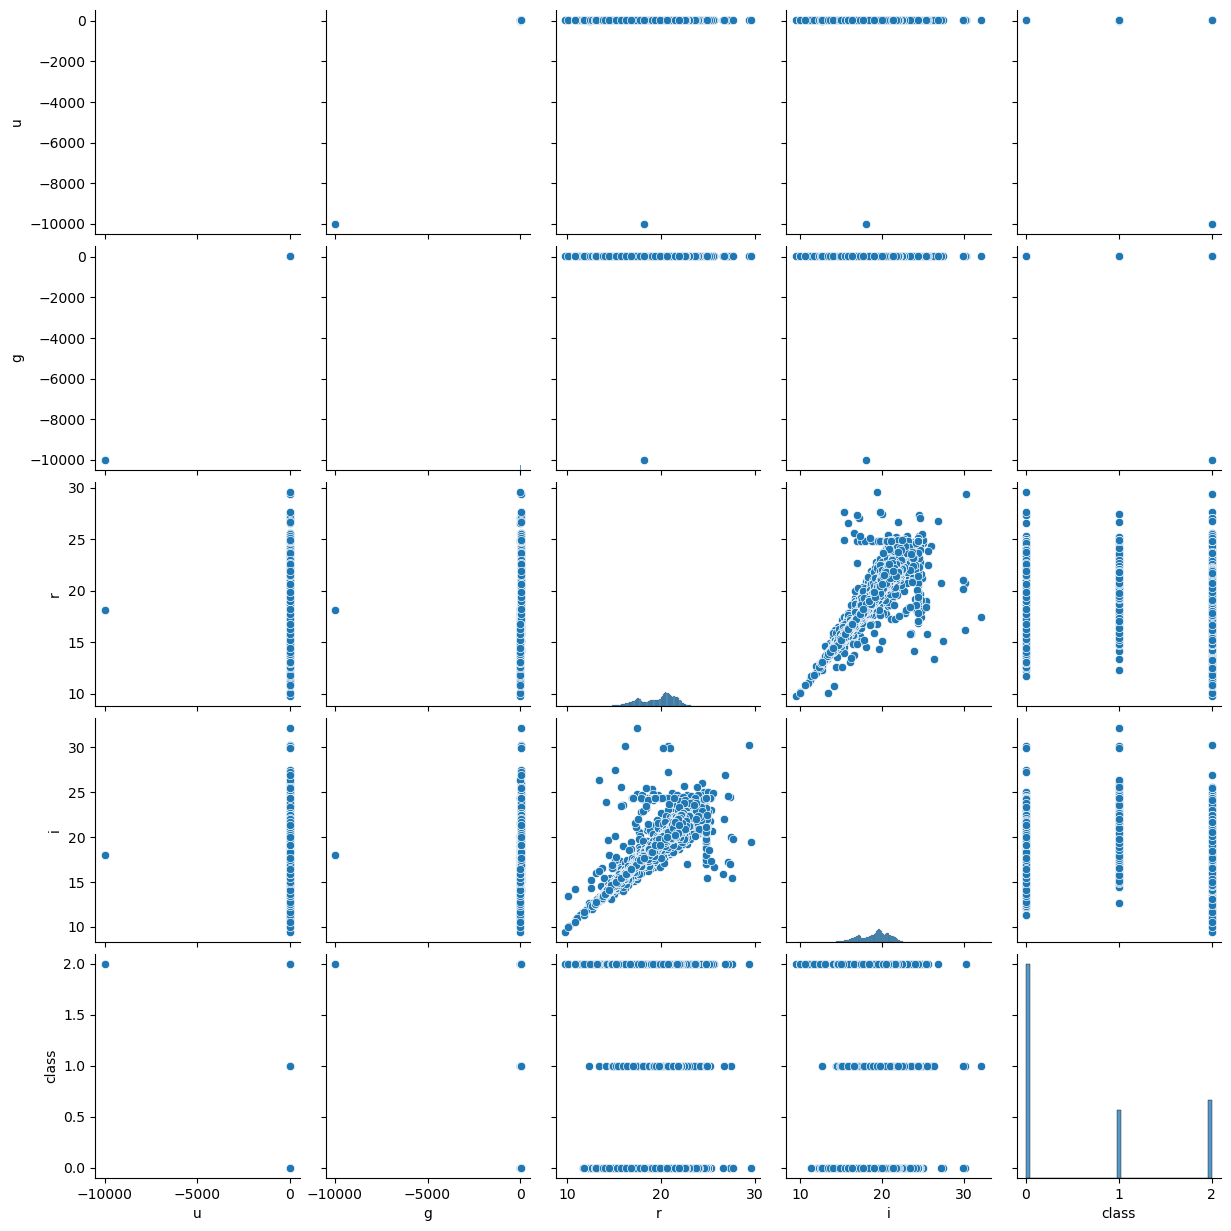

In [12]:
sns.pairplot(df[['u','g','r','i','class']])      # to understand interdependancy of train features
plt.show()

## Feature Selection

In [18]:
x=df.drop(['class'],axis=1)
y=df['class']

In [20]:
x

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,0.455040,6751,56368,470


In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int32

## Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,fiber_ID
75220,155.057478,39.471934,22.32247,21.40113,20.51302,19.62691,19.34791,6,0.659869,4562,55570,45
48955,29.186923,33.102558,25.85486,24.22573,21.48514,20.38426,19.38826,5,0.813819,7735,58136,763
44966,143.780304,16.857367,22.62750,21.41766,19.54710,18.87770,18.39861,2,0.404277,5317,56000,499
13568,154.753807,34.679618,20.25937,18.53387,17.58141,17.16960,16.85448,6,0.108840,1954,53357,63
92727,212.519940,36.429773,22.03892,21.46501,21.32925,21.26120,21.17124,3,-0.001039,3855,55268,690
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,242.605987,36.722746,20.82854,20.32382,20.25718,20.39426,20.36549,2,2.412806,10733,58244,380
54886,171.747491,53.692339,18.93209,16.96611,16.05940,15.64639,15.30356,2,0.081128,1013,52707,104
76820,156.991726,38.612456,23.95684,21.37612,19.75149,18.49137,17.77083,3,0.000253,3262,54884,541
860,55.829432,9.764397,17.79224,16.47265,15.84970,15.59104,15.46414,5,0.000000,2679,54368,287


In [31]:
x_test

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,fiber_ID
75721,16.956890,3.646130,23.33542,21.95143,20.48149,19.60300,19.13094,6,0.506237,4312,55511,495
80184,240.063240,6.134131,17.86033,16.79228,16.43001,16.30923,16.25873,1,0.000345,2175,54612,348
19864,30.887222,1.188710,18.18911,16.89469,16.42161,16.24627,16.18549,1,0.000004,7332,56683,943
76699,247.594401,10.887780,24.99961,21.71203,21.47148,21.30532,21.29109,1,-0.000291,4066,55444,326
92991,18.896451,-5.261330,23.76648,21.79737,20.69543,20.23403,19.97464,3,-0.000136,7914,57331,363
...,...,...,...,...,...,...,...,...,...,...,...,...
32595,56.408754,-0.427876,25.96668,22.34189,20.51058,19.58495,19.27426,2,0.951446,2639,54116,63
29313,205.345647,45.771756,19.13869,18.18734,17.83827,17.58269,17.47745,4,0.146749,1465,53082,440
37862,133.646508,32.439511,20.25033,18.46052,17.29299,16.81968,16.45809,4,0.191533,1271,52974,433
53421,260.035351,32.700054,26.77411,22.55472,20.82445,19.68547,19.29822,4,0.619842,4998,55722,810


In [33]:
y_train

75220    0
48955    0
44966    0
13568    0
92727    2
        ..
6265     1
54886    0
76820    2
860      0
15795    0
Name: class, Length: 80000, dtype: int32

In [35]:
y_test

75721    0
80184    2
19864    2
76699    2
92991    2
        ..
32595    0
29313    0
37862    0
53421    0
42410    0
Name: class, Length: 20000, dtype: int32

## scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [23]:
x[:10]

array([[-4.34603584e-01,  4.25528706e-01,  5.97545987e-02,
         5.49261638e-02,  4.03961550e-01,  4.60074020e-02,
         3.93657668e-03, -9.52552725e-01,  7.95572845e-02,
         2.28632913e-01,  4.23203207e-01, -1.02134224e+00],
       [-3.39921434e-01,  3.63402270e-01,  8.80452678e-02,
         7.24561688e-02,  1.58440609e+00,  1.18509719e+00,
         9.28347300e-02,  9.37920462e-01,  2.77096198e-01,
         1.79792394e+00,  1.42072864e+00, -8.18825036e-02],
       [-3.67250583e-01,  5.82712741e-01,  1.03326768e-01,
         6.71651675e-02,  5.19745322e-01,  1.50018697e-01,
         8.80798469e-03, -9.52552725e-01,  9.24228290e-02,
        -1.90025346e-01,  1.85377163e-03, -5.51612374e-01],
       [ 1.66952317e+00, -1.24910526e+00,  4.92149837e-03,
         1.02209744e-01,  1.05990425e+00,  8.07609690e-01,
         1.83210352e-02, -3.22394996e-01,  4.86770265e-01,
         1.35894247e+00,  1.35492735e+00,  1.19519558e+00],
       [ 1.73731007e+00, -1.50241997e-01, -8.0055327

## Building Models

### decision tree classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [34]:
model1=DecisionTreeClassifier()

In [36]:
model1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=3,min_samples_split=4,criterion='entropy')

In [38]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=4)

In [39]:
y_pred=model1.predict(x_test)
y_pred

array([0, 2, 2, ..., 0, 0, 0])

In [40]:
accuracy_score(y_pred,y_test)

0.94695

In [41]:
y_pred1=model1.predict(x_train)

In [45]:
accuracy_score(y_pred1,y_train)

0.947425

In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.94695

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     11860
           1       0.95      0.79      0.86      3797
           2       0.98      1.00      0.99      4343

    accuracy                           0.95     20000
   macro avg       0.95      0.92      0.94     20000
weighted avg       0.95      0.95      0.95     20000


Confusion Matrix:
 [[11583   171   106]
 [  783  3013     1]
 [    0     0  4343]]


### logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [53]:
model2.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred=model2.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
accuracy_score(y_pred,y_test)

0.6009

In [56]:
y_pred2=model2.predict(x_train)

In [57]:
accuracy_score(y_pred2,y_train)

0.600625

In [58]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6009

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.98      0.75     11860
           1       0.49      0.12      0.19      3797
           2       0.00      0.00      0.00      4343

    accuracy                           0.60     20000
   macro avg       0.37      0.36      0.31     20000
weighted avg       0.45      0.60      0.48     20000


Confusion Matrix:
 [[11568   292     0]
 [ 3347   450     0]
 [ 4167   176     0]]


### KNeighbor classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=3)

In [61]:
model3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
y_pred=model3.predict(x_test)
y_pred

array([0, 2, 2, ..., 0, 0, 0])

In [63]:
accuracy_score(y_pred,y_test)

0.6723

In [64]:
y_pred3=model3.predict(x_train)

In [65]:
accuracy_score(y_pred3,y_train)

0.800625

In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6723

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78     11860
           1       0.46      0.34      0.39      3797
           2       0.66      0.46      0.54      4343

    accuracy                           0.67     20000
   macro avg       0.61      0.55      0.57     20000
weighted avg       0.66      0.67      0.65     20000


Confusion Matrix:
 [[10173   977   710]
 [ 2205  1291   301]
 [ 1850   511  1982]]


### xgboost

In [52]:
from xgboost import XGBClassifier
model4=XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

In [54]:
model4.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [56]:
y_pred=model4.predict(x_test)
y_pred

array([0, 2, 2, ..., 0, 0, 0], dtype=int64)

In [58]:
accuracy_score(y_pred,y_test)

0.9727

In [60]:
y_pred4=model4.predict(x_train)

In [62]:
accuracy_score(y_pred4,y_train)

0.97395

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9727

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     11860
           1       0.97      0.91      0.94      3797
           2       0.98      1.00      0.99      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.97     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[11666   121    73]
 [  337  3459     1]
 [   14     0  4329]]


### adaboosting

In [76]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=5),
                                   n_estimators=50, 
                                   learning_rate=1.0, 
                                   random_state=42)


In [77]:
model5.fit(x_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=5),
                   random_state=42)

In [78]:
y_pred=model5.predict(x_test)
y_pred

array([0, 2, 2, ..., 0, 0, 0])

In [79]:
accuracy_score(y_pred,y_test)

0.9752

In [80]:
y_pred5=model5.predict(x_train)

In [81]:
accuracy_score(y_pred5,y_train)

0.9999875

In [82]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9752

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     11860
           1       0.97      0.92      0.94      3797
           2       0.98      1.00      0.99      4343

    accuracy                           0.98     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000


Confusion Matrix:
 [[11655   125    80]
 [  288  3508     1]
 [    2     0  4341]]


### gradient boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
model6=GradientBoostingClassifier(n_estimators=150,
                        learning_rate=0.3,
                        random_state=12)

In [92]:
model6.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=150, random_state=12)

In [94]:
y_pred=model6.predict(x_test)
y_pred

array([0, 2, 2, ..., 0, 0, 0])

In [95]:
accuracy_score(y_pred,y_test)

0.97725

In [96]:
y_pred5=model6.predict(x_train)

In [97]:
accuracy_score(y_pred5,y_train)

0.9853

In [98]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.97725

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     11860
           1       0.96      0.92      0.94      3797
           2       1.00      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000


Confusion Matrix:
 [[11717   127    16]
 [  297  3500     0]
 [   15     0  4328]]


## Decision Tree

In [26]:
dtree=DecisionTreeClassifier()
params={'max_depth': [2, 3, 4],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [2, 4, 6],
        'criterion': ['entropy', 'gini']}

#gridsearch cv
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(dtree,params,cv=5)
gscv.fit(x_train,y_train)

print("Best decision_tree Parameters:", gscv.best_params_)
print("Best decision_tree Score:", gscv.best_score_)

Best decision_tree Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best decision_tree Score: 0.9648


## XG Boosting

In [37]:
xgboost=XGBClassifier(random_state=42)
params={'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5]}

#gridsearch cv
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(xgboost,param,cv=5)
gscv.fit(x_train,y_train)

print("Best XGBoost Parameters:", gscv.best_params_)
print("Best XGBoost Score:", gscv.best_score_)

Best XGBoost Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best XGBoost Score: 0.9759249999999999


## Adaboosting

In [25]:
adaboost=AdaBoostClassifier(random_state=42)
params={'n_estimators': [10,15,20],
        'learning_rate': [0.01, 0.05, 0.1]}

#gridsearch cv
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(adaboost,params,cv=3)
gscv.fit(x_train,y_train)

print("Best AdaBoost Parameters:", gscv.best_params_)
print("Best AdaBoost Score:", gscv.best_score_)

Best AdaBoost Parameters: {'learning_rate': 0.01, 'n_estimators': 10}
Best AdaBoost Score: 0.8052624943140735


## Gradient Boosting

In [29]:
gboost=GradientBoostingClassifier(random_state=42)
params:{'n_estimators': [10, 15, 20],
        'learning_rate': [0.01, 0.05, 0.1]}

#gridsearch cv
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(gboost,params,cv=5)
gscv.fit(x_train,y_train)

print("Best Gradient Boost Parameters:", gscv.best_params_)
print("Best Gradient Boost Score:", gscv.best_score_)

Best Gradient Boost Parameters: {'learning_rate': 0.1, 'n_estimators': 20}
Best Gradient Boost Score: 0.9669000000000001


# Determining best model

In [23]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "XG Boosting": XGBClassifier(random_state=42),
    "Adaboosting": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate models
model_results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    
    # Store results
    model_results[name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': confusion_mat
    }

# Display results
for name, result in model_results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])



Model: Decision Tree
Accuracy: 0.9646
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11860
           1       0.91      0.91      0.91      3797
           2       1.00      0.99      0.99      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
[[11509   332    19]
 [  328  3469     0]
 [   28     1  4314]]

Model: XG Boosting
Accuracy: 0.977
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11860
           1       0.96      0.93      0.95      3797
           2       0.99      1.00      0.99      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

Confusion Matrix:
[[11678   131    

In [44]:
# Models dictionary
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "XG Boosting": XGBClassifier(random_state=42),
    "Adaboosting": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate models
model_results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, predictions)
    classification_rep = classification_report(y_test, predictions, output_dict=True)  # Output dict for structured data
    confusion_mat = confusion_matrix(y_test, predictions)
    
    # Store results
    model_results[name] = {
        'Accuracy': accuracy,
        'Precision': classification_rep['weighted avg']['precision'],
        'Recall': classification_rep['weighted avg']['recall'],
        'F1-Score': classification_rep['weighted avg']['f1-score'],
        'Confusion Matrix': confusion_mat
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T.drop(columns=['Confusion Matrix'])  # Drop nested column

# Display results
print("Model Performance:")
print(results_df)

# Identify the best model based on accuracy
best_model_name = results_df['Accuracy'].idxmax()
print(f"\nBest Model: {best_model_name}")
print(f"Performance:\n{results_df.loc[best_model_name]}")

# Optional: Display confusion matrix for the best model
print("\nConfusion Matrix for the Best Model:")
print(model_results[best_model_name]['Confusion Matrix'])


Model Performance:
                  Accuracy Precision   Recall  F1-Score
Decision Tree      0.96545  0.965463  0.96545  0.965456
XG Boosting          0.977  0.976897    0.977   0.97688
Adaboosting        0.66245  0.701995  0.66245  0.678348
Gradient Boosting  0.97665  0.976573  0.97665  0.976442

Best Model: XG Boosting
Performance:
Accuracy        0.977
Precision    0.976897
Recall          0.977
F1-Score      0.97688
Name: XG Boosting, dtype: object

Confusion Matrix for the Best Model:
[[11678   131    51]
 [  261  3535     1]
 [   16     0  4327]]


## Saving & re-loading 

In [64]:
import joblib
joblib.dump(model4,'Project')

['Project']

In [66]:
joblib_reload=joblib.load('Project')

In [68]:
joblib_reload

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Training Decision Tree...


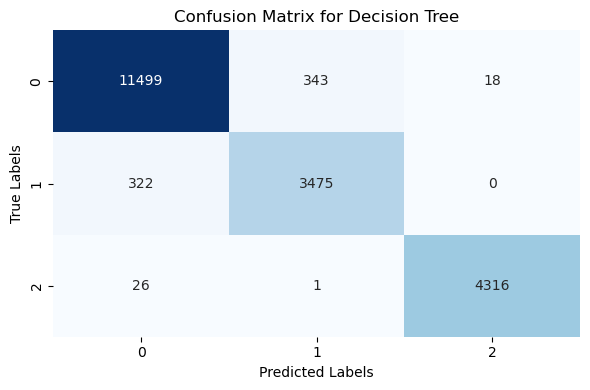

Training XG Boosting...


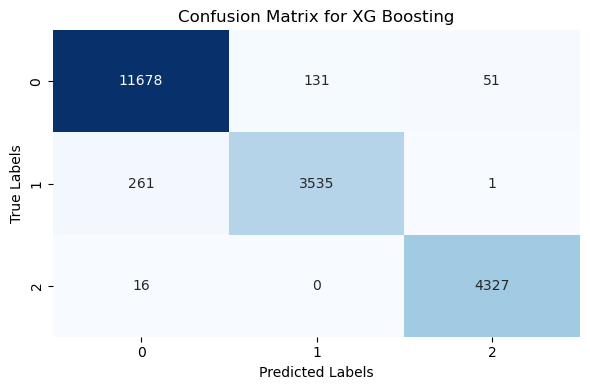

Training Adaboosting...


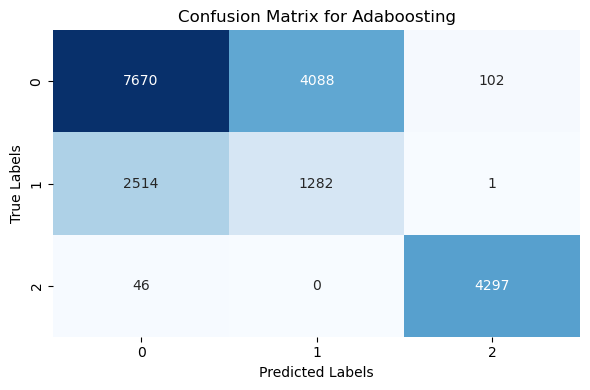

Training Gradient Boosting...


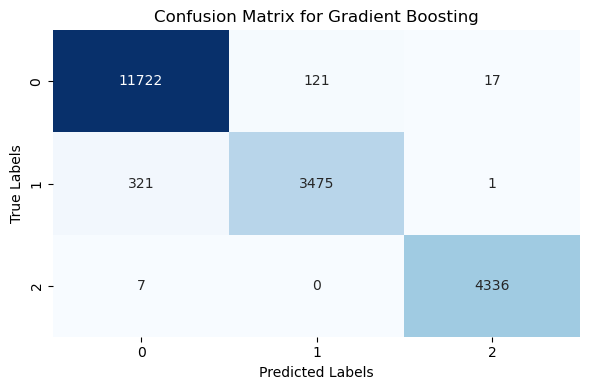

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Iterate over the models and plot the confusion matrix for each one
for model_name, model in models.items():  # Use .items() to get model name and instance
    print(f"Training {model_name}...")
    model.fit(x_train, y_train)  # Use consistent variable names
    y_pred = model.predict(x_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
# Plot confusion matrix
    plt.figure(figsize=(6, 4))  # Increase figure size for clarity
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()